## About Dataset
- Digital payments are evolving, but so are cyber criminals.
- According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

- In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

**This Dataset sourced by some unnamed institute.**

## Feature Explanation:
- distance_from_home - the distance from home where the transaction happened.

- distance_from_last_transaction - the distance from last transaction happened.

- ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

- repeat_retailer - Is the transaction happened from same retailer.

- used_chip - Is the transaction through chip (credit card).

- used_pin_number - Is the transaction happened by using PIN number.

- online_order - Is the transaction an online order.

- fraud - Is the transaction fraudulent.

**Ref : https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('card_transdata.csv')

In [3]:
df = raw_data.copy()

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


((1000000, 8), None)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


- "distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price" columns should be standardized in the prediction part.

# Exploratory Data Analysis


In [8]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

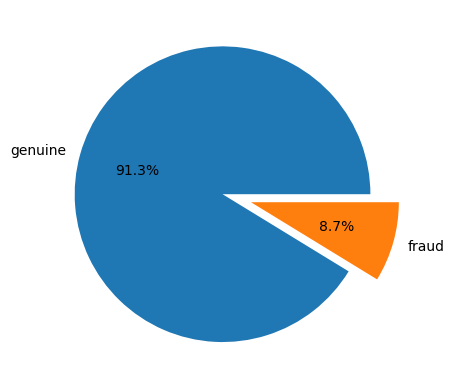

In [9]:
graph = df['fraud'].value_counts(ascending=False)

plt.pie(x=graph.values, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

### Takeaways:
- The Dataset is highly **imbalanced**
- **Undersampling** will be used in prediction part. 

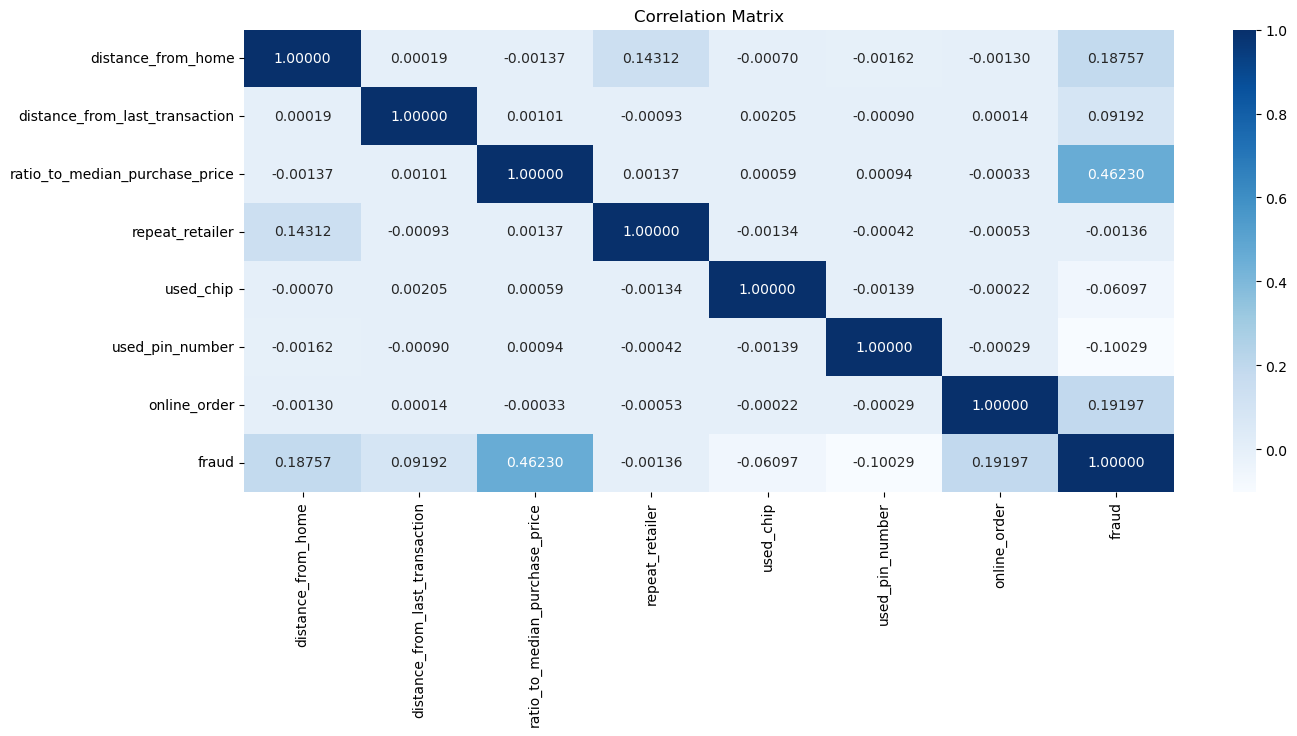

In [10]:
fig = plt.figure(figsize = (15,6))

sns.heatmap(df.corr(), annot=True, fmt='.5f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

- Most of the features correlations are close to **"0"**. So it is very hard to see the correlation

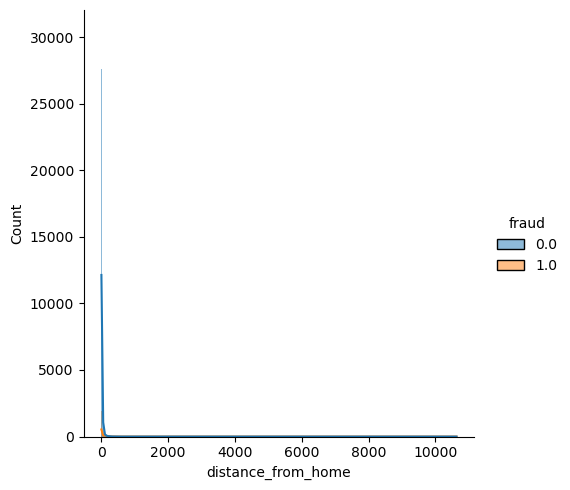

In [11]:
sns.displot(data=df, x='distance_from_home', hue='fraud', kde=True)
plt.show()

- As can be seen from the graph it is not scaled and run time is quite high
- I will try to use log scale to solve this problem.

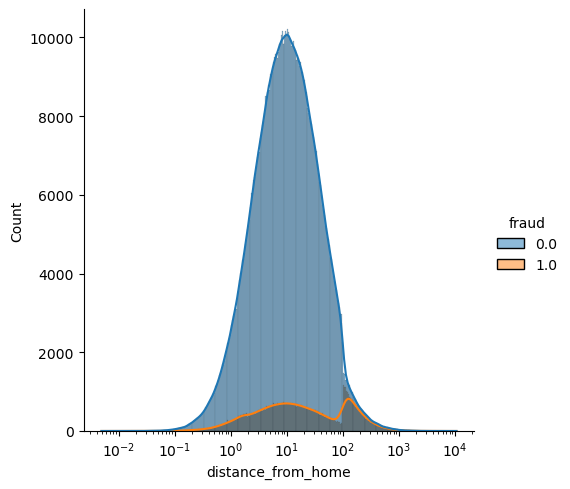

In [12]:
sns.displot(data=df, x='distance_from_home', hue='fraud', log_scale=True, kde=True)
plt.show()

- **log_scale** has solved the problem.

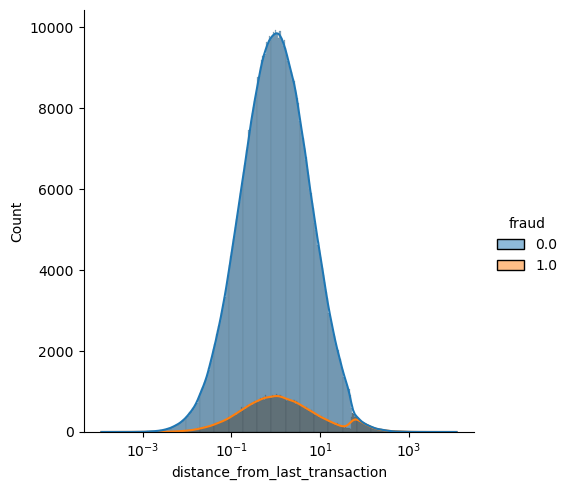

In [13]:
sns.displot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

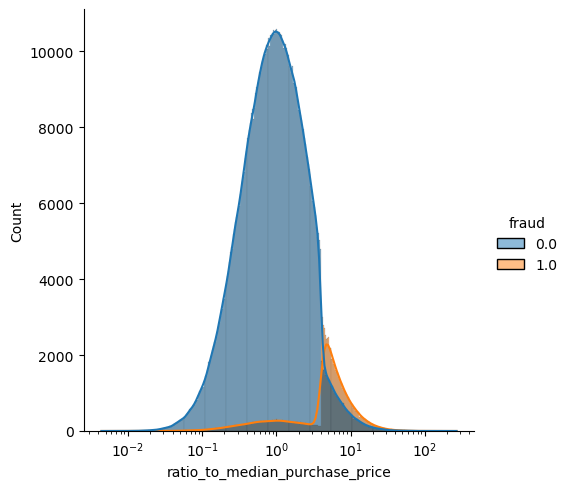

In [14]:
sns.displot(data=df, x='ratio_to_median_purchase_price', hue='fraud', log_scale=True, kde=True)
plt.show()

### First 3 plot's distribution is normal

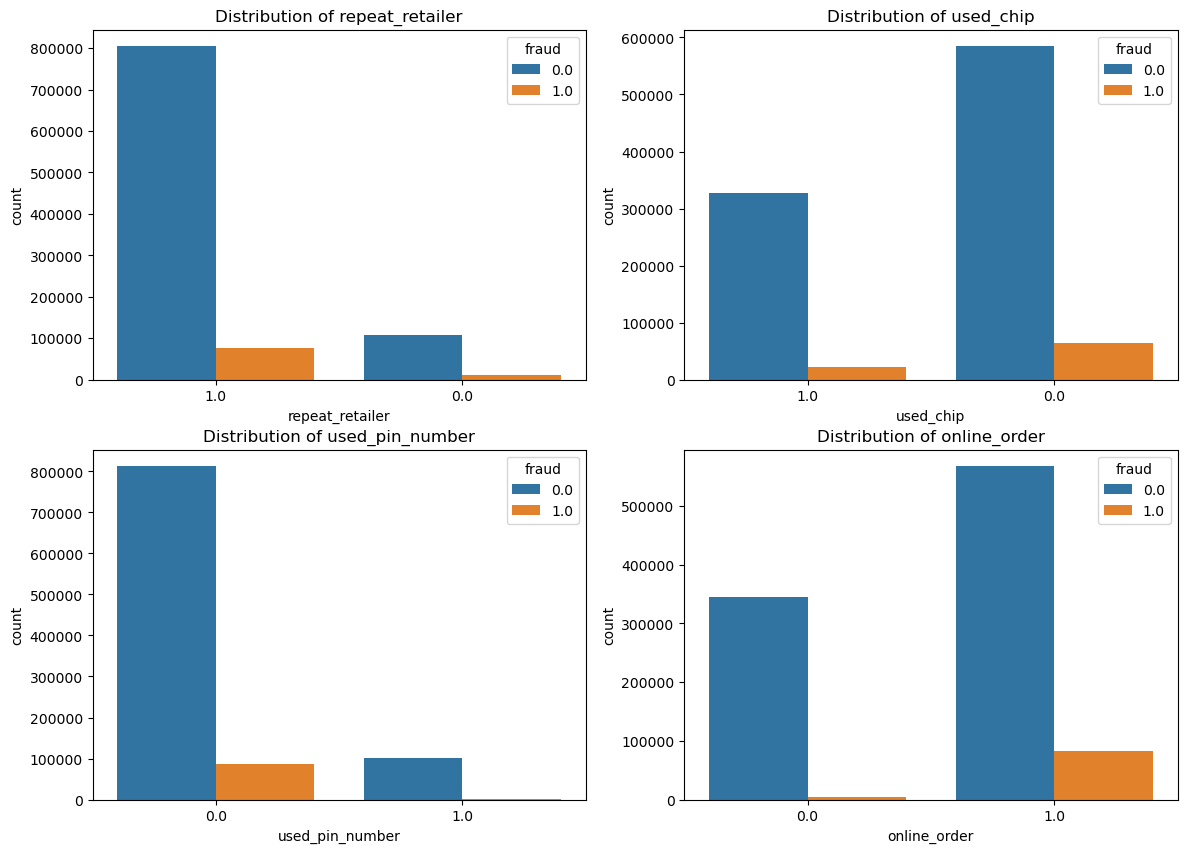

In [15]:
plot_iterate = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(plot_iterate):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.show()

In [16]:
def plot_boxplots(df, columns):

    fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    
    for i, col in enumerate(columns):
        bp = df.boxplot(column=col, ax=ax[i], whis=[5, 95], widths=0.4, sym='o')
        ax[i].set_title(col)
    
    fig.suptitle('Boxplots of Numeric Variables', fontsize=16)
    plt.tight_layout()
    plt.show()

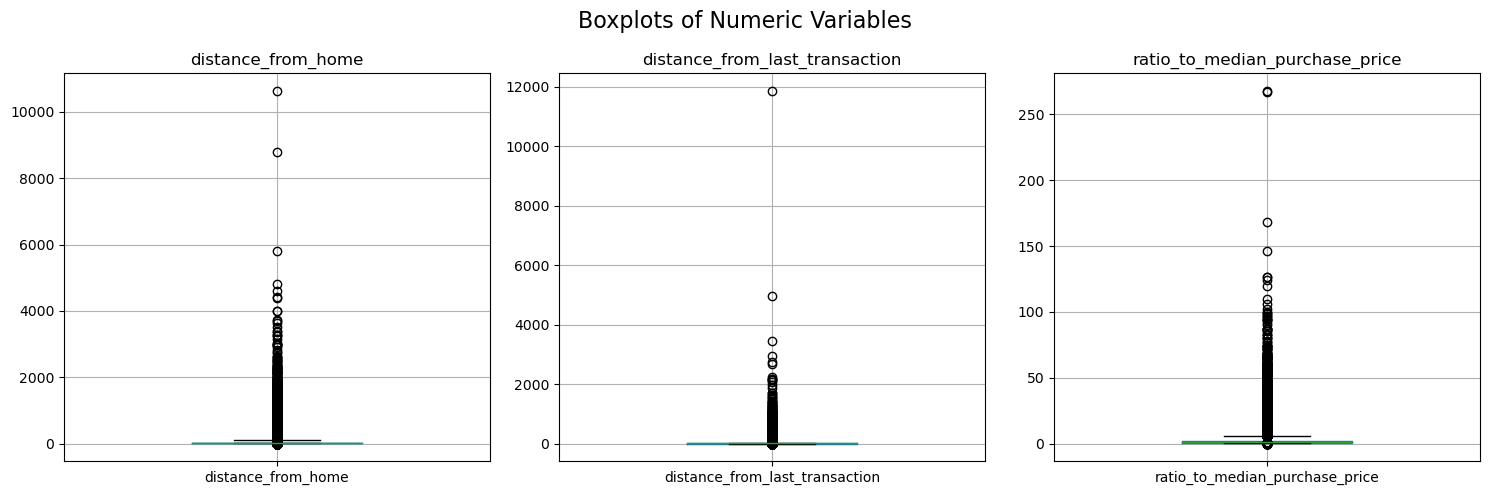

In [17]:
columns_to_plot = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
plot_boxplots(df, columns_to_plot)

In [18]:
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [19]:
legit.shape

(912597, 8)

In [20]:
fraud.shape

(87403, 8)

In [21]:
legit.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [22]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


### First three column's values are significantly higher in fraud transactions

In [23]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


## Undersampling

In [24]:
legit_sample = legit.sample(n = 87403)


In [25]:
new_df = pd.concat([legit_sample, fraud], axis = 0)

In [26]:
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
585030,19.495387,33.231652,2.569165,1.0,0.0,1.0,1.0,0.0
609327,23.582695,0.399227,0.242552,1.0,0.0,0.0,0.0,0.0
780603,0.853967,0.245225,1.317595,0.0,0.0,0.0,1.0,0.0
315388,90.203572,7.571477,0.417642,1.0,0.0,0.0,1.0,0.0
705120,20.241382,4.066088,0.816207,1.0,1.0,0.0,0.0,0.0


In [27]:
new_df['fraud'].value_counts()

0.0    87403
1.0    87403
Name: fraud, dtype: int64

In [28]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [29]:
new_df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.618911,4.195138,1.423417,0.880199,0.359438,0.110442,0.623034
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


- New dataset contains similar distribution as shown above, '.sample' function works like a charm.

## Splitting the data into features and targets

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X = new_df.drop(columns = 'fraud', axis = 1)
Y = new_df['fraud']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(174806, 7) (139844, 7) (34962, 7)


In [34]:
new_df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [36]:
def train_models(X_train, y_train, X_test, y_test):
    # Training a logistic regression model using cross-validation
    lr = LogisticRegression()
    lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='recall')
    lr_recall = lr_scores.mean()
    lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
    lr_acc_train = lr_scores.mean()
    lr.fit(X_train, y_train)
    lr_acc_test = lr.score(X_test, y_test)
    
    # Training a random forest model using cross-validation
    rf = RandomForestClassifier()
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')
    rf_recall = rf_scores.mean()
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
    rf_acc_train = rf_scores.mean()
    rf.fit(X_train, y_train)
    rf_acc_test = rf.score(X_test, y_test)
    
    # Printing the results
    print("Logistic Regression Train Accuracy: {:.2f}".format(lr_acc_train))
    print("Logistic Regression Test Accuracy: {:.2f}".format(lr_acc_test))
    print("Logistic Regression Recall: {:.2f}".format(lr_recall))
    print("Random Forest Train Accuracy: {:.2f}".format(rf_acc_train))
    print("Random Forest Test Accuracy: {:.2f}".format(rf_acc_test))
    print("Random Forest Recall: {:.2f}".format(rf_recall))
    
    # Generating a classification report
    lr_pred = lr.predict(X_test)
    print("\nLogistic Regression Classification Report:")
    print(classification_report(y_test, lr_pred))
    rf_pred = rf.predict(X_test)
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_pred))
    
    # Generating ROC curve and AUC score
    lr_prob = lr.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
    auc_score = roc_auc_score(y_test, lr_prob)
    plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(auc_score))
    rf_prob = rf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
    auc_score = roc_auc_score(y_test, rf_prob)
    plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return lr, rf

Logistic Regression Train Accuracy: 0.94
Logistic Regression Test Accuracy: 0.94
Logistic Regression Recall: 0.95
Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 1.00
Random Forest Recall: 1.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17474
         1.0       0.93      0.95      0.94     17488

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17474
         1.0       1.00      1.00      1.00     17488

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



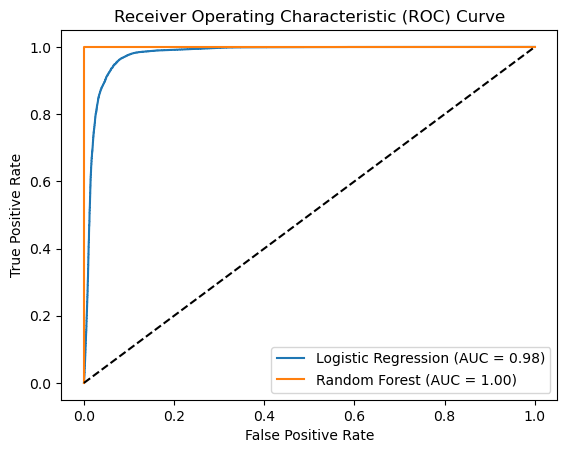

(LogisticRegression(), RandomForestClassifier())

In [37]:
train_models(X_train, y_train, X_test, y_test)